# Retrieving BBC news data

In [11]:
!wget https://github.com/MLDA-NTU/workshops-2021-22/raw/main/5.%20Intro%20to%20NLP/bbc-fulltext.zip

--2021-09-25 05:29:29--  https://github.com/MLDA-NTU/workshops-2021-22/raw/main/5.%20Intro%20to%20NLP/bbc-fulltext.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MLDA-NTU/workshops-2021-22/main/5.%20Intro%20to%20NLP/bbc-fulltext.zip [following]
--2021-09-25 05:29:29--  https://raw.githubusercontent.com/MLDA-NTU/workshops-2021-22/main/5.%20Intro%20to%20NLP/bbc-fulltext.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874078 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-09-25 05:29:29 (71.3

In [12]:
!apt-get install -y fuse-zip
!fuse-zip /content/bbc-fulltext.zip {"/content/"} -o nonempty

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fuse-zip is already the newest version (0.4.4-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Importing spaCy and its language model

In [ ]:
!pip install textacy==0.11.0
!pip install spacy

     |████████████████████████████████| 200 kB 3.9 MB/s 
     |████████████████████████████████| 134 kB 54.2 MB/s 
     |████████████████████████████████| 2.0 MB 39.9 MB/s 
     |████████████████████████████████| 5.9 MB 9.7 MB/s 
     |████████████████████████████████| 1.6 MB 58.0 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 10.1 MB 33.1 MB/s 
     |████████████████████████████████| 623 kB 71.7 MB/s 
     |████████████████████████████████| 456 kB 68.4 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.8.8-cp37-cp37m-linux_x86_64.whl size=73222 sha256=070b4d019ae3936641721becb7c8b47a419406a03c802fefee8971dc0f01b22b
  Stored in directory: /root/.cache/pip/wheels/82/aa/f4/716387e1f167cbbf911488aa056138152f4d8699c9c9b43ea8
Successfully built jellyfish
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting u

In [ ]:
import pandas as pd
import numpy as np
import spacy
import textacy
from spacy import displacy
from textacy.extract import ngrams, entities
%matplotlib inline

In [ ]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     |████████████████████████████████| 13.6 MB 76 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Exploring a simple NLP pipeline

## **Example**

When you call a spaCy model on a text, spaCy 

1) tokenizes the text to produce a `Doc` object. 

2) passes the `Doc` object through the processing pipeline that may be customized, and for the default models consists of
- a tagger, 
- a parser and 
- a named entity recognizer (NER). 

Each pipeline component returns the processed Doc, which is then passed on to the next component.
![](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [ ]:
sample_text = 'Apple is looking at buying U.K. startup for $1 billion'
doc = nlp(sample_text)

In [ ]:
doc.text

'Apple is looking at buying U.K. startup for $1 billion'

In [ ]:
df = pd.DataFrame([[t.text, t.lemma_, t.pos_, t.tag_, t.dep_, t.is_alpha, t.is_stop]
              for t in doc],
             columns=['text', 'lemma', 'pos', 'tag', 'dependency', 'alphanumeric', 'stop-word'])
df

,text,lemma,pos,tag,dependency,alphanumeric,stop-word
0,Apple,Apple,PROPN,NNP,nsubj,True,False
1,is,be,AUX,VBZ,aux,True,True
2,looking,look,VERB,VBG,ROOT,True,False
3,at,at,ADP,IN,prep,True,True
4,buying,buy,VERB,VBG,pcomp,True,False
5,U.K.,U.K.,PROPN,NNP,compound,False,False
6,startup,startup,NOUN,NN,dobj,True,False
7,for,for,ADP,IN,prep,True,True
8,$,$,SYM,$,quantmod,False,False
9,1,1,NUM,CD,compound,False,False


In [ ]:
pos_list = [i for i in df["pos"].unique()]
pos_list

['PROPN', 'AUX', 'VERB', 'ADP', 'NOUN', 'SYM', 'NUM']

In [ ]:
for pos in pos_list:
  print(f"{pos} = {spacy.explain(pos)}")

PROPN = proper noun
AUX = auxiliary
VERB = verb
ADP = adposition
NOUN = noun
SYM = symbol
NUM = numeral


In [ ]:
options = {'compact': True}
displacy.render(doc, style='dep', options=options, jupyter=True)

In [ ]:
# Print sentence with named entity recognition
displacy.render(doc, style='ent', jupyter=True)

##**Exercise 1**

In [ ]:
headline = 'AstraZeneca to invest $360 million in Irish drug manufacturing site'
# Parse the headline into a spaCy 'doc'

### WRITE YOUR CODE HERE ###
doc = nlp(headline)
### END YOUR CODE HERE ###

# Transform spaCy doc attributes to a pandas dataframe
df = pd.DataFrame([[t.text, t.lemma_, t.pos_, t.tag_, t.dep_, t.is_alpha, t.is_stop]
              for t in doc],
             columns=['text', 'lemma', 'pos', 'tag', 'dependency', 'alphanumeric', 'stop-word']) 
df

,text,lemma,pos,tag,dependency,alphanumeric,stop-word
0,AstraZeneca,astrazeneca,NOUN,NN,nsubj,True,False
1,to,to,PART,TO,aux,True,True
2,invest,invest,VERB,VB,ROOT,True,False
3,$,$,SYM,$,quantmod,False,False
4,360,360,NUM,CD,compound,False,False
5,million,million,NUM,CD,dobj,True,False
6,in,in,ADP,IN,prep,True,True
7,Irish,irish,ADJ,JJ,amod,True,False
8,drug,drug,NOUN,NN,compound,True,False
9,manufacturing,manufacturing,NOUN,NN,compound,True,False


In [ ]:
# Gather all the dependencies of the above dataframe into a list, then explain what they mean

### WRITE YOUR CODE HERE ###
dep_list = [i for i in df["dependency"].unique()]
for dep in dep_list:
  print(f"{dep} = {spacy.explain(dep)}")
### END YOUR CODE HERE ###

nsubj = nominal subject
aux = auxiliary
ROOT = None
quantmod = modifier of quantifier
compound = compound
dobj = direct object
prep = prepositional modifier
amod = adjectival modifier
pobj = object of preposition


# Parsing BBC news data with spaCy

## **Example**

In [ ]:
from pathlib import Path
data_dir = Path("/content/bbc")
files = (data_dir).glob('**/*.txt')
bbc_articles = []
for i, file in enumerate(sorted(list(files))):
    with file.open(encoding='latin1') as f:
        lines = f.readlines()
        body = ' '.join([l.strip() for l in lines[1:]]).strip()
        bbc_articles.append(body)

In [ ]:
len(bbc_articles)

2225

In [ ]:
bbc_articles[0]

'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high-

In [ ]:
doc = nlp(bbc_articles[0])

In [ ]:
# spaCy is capable of sentence boundary detection, so let's work with the first 3 sentences to test that
sentences = [s for s in doc.sents if len(s) > 1]
sent = sentences[:3]
sent

[Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.,
 The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.,
 TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.]

In [ ]:
df = pd.DataFrame([[t.text, t.pos_, spacy.explain(t.pos_)] for t in doc], 
             columns=['Token', 'POS Tag', 'Meaning'])
df

,Token,POS Tag,Meaning
0,Quarterly,ADJ,adjective
1,profits,NOUN,noun
2,at,ADP,adposition
3,US,PROPN,proper noun
4,media,NOUN,noun
...,...,...,...
505,value,NOUN,noun
506,of,ADP,adposition
507,that,DET,determiner
508,stake,NOUN,noun


In [ ]:
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
ent_list = []
for t in doc:
  if t.ent_type_:
    ent_list.append(t.ent_type_)
named_ent = np.unique(ent_list)

In [ ]:
for ent in named_ent:
  print('{} | {}'.format(ent, spacy.explain(ent)))

CARDINAL | Numerals that do not fall under another type
DATE | Absolute or relative dates or periods
GPE | Countries, cities, states
MONEY | Monetary values, including unit
NORP | Nationalities or religious or political groups
ORDINAL | "first", "second", etc.
ORG | Companies, agencies, institutions, etc.
PERCENT | Percentage, including "%"
PERSON | People, including fictional


## **Exercise 2**

In [ ]:
# Load in a random article in our "bbc_articles" list
np.random.seed(42)
article = str(np.random.choice(bbc_articles))
doc = nlp(article)
doc.text

'Women in the UK film industry earn less than their male counterparts despite being better qualified, according to a study released on Wednesday.  Only 16% of women earn more than Â£50,000, compared with 30% of men. Women make up a third of the workforce. The research was carried out jointly by the UK Film Council and industry training body Skillset. It also found that women in the industry were less likely than men to be married or have dependant children.  The study, which claims to be the most in-depth so far conducted, found 60% of women in the film industry hold degrees, compared with 39% of men. Whilst 17% of men in the industry had no qualifications, this was true for only five per cent of women. In the lower salary bracket, 35% of women earn less than Â£20,000 a year, compared to only 18% of men. The research found very few women worked in the camera, sound, electrical and construction departments, but they made up a majority of those working in make-up and hairdressing.  UK Fi

In [ ]:
# Get the first 3 sentences of this article
sents = [s for s in doc.sents if len(s) > 1][:3]

# Print out the sentences with their named entities
### WRITE YOUR CODE HERE
displacy.render(sents, style="ent", jupyter=True)
### END YOUR CODE HERE

# Sentiment Analysis with TextBlob

## **Example**

In [ ]:
from textblob import TextBlob, Word
from pathlib import Path

In [ ]:
data_dir = Path("/content/bbc")
files = (data_dir).glob('**/*.txt')

doc_list = []
for i, file in enumerate(files):
    topic = file.parts[-2]
    article = file.read_text(encoding='latin1').split('\n')
    heading = article[0].strip()
    body = ' '.join([l.strip() for l in article[1:]])
    doc_list.append([topic, heading, body])

In [ ]:
docs = pd.DataFrame(doc_list, columns=['topic', 'heading', 'body'])
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   topic    2225 non-null   object
 1   heading  2225 non-null   object
 2   body     2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [ ]:
article = docs.sample(1, random_state=42).squeeze()
print(f'Topic:\t{article.topic.capitalize()}\n\n{article.heading}\n')
article.body

Topic:	Business

UK house prices dip in November



' UK house prices dipped slightly in November, the Office of the Deputy Prime Minister (ODPM) has said.  The average house price fell marginally to Â£180,226, from Â£180,444 in October. Recent evidence has suggested that the UK housing market is slowing after interest rate increases, and economists forecast a drop in prices during 2005. But while the monthly figures may hint at a cooling of the market, annual house price inflation is still strong, up 13.8% in the year to November. Economists, however, forecast that ODPM figures are likely to show a weakening in annual house price growth in coming months. "Overall, the housing market activity is slowing down and that is backed up by the mortgage lending and the mortgage approvals data," said Mark Miller, at HBOS Treasury Services. "The ODPM data is a fairly lagging indicator."  The figures come after the Bank of England said the number of mortgages approved in the UK has fallen to the lowest level for nearly a decade. The Halifax, meanw

In [ ]:
parsed_article = TextBlob(article.body)

In [ ]:
# Polarity is a float which lies between -1 and 1 that indicates whether there is a positive or negative sentiment associated with the text
## -1 indicates very negative sentiment while 1 indicates the opposite (very positive)
polarity = parsed_article.sentiment.polarity
print(f"Polarity of the article analyzed is {polarity}")

Polarity of the article analyzed is 0.10447845804988663


In [ ]:
# Subjectivity is a float which lies between 0 and 1 that refers to how much of the article is dominated by personal opinion, emotion, judgement etc
## 0 indicates an objective article while 1 indicates a subjective article
subjectivity = parsed_article.sentiment.subjectivity
print(f"Subjectivity of the article analyzed is {subjectivity}")

Subjectivity of the article analyzed is 0.44258786848072557


## **Exercise 3**

In [ ]:
# Analyze the following sample texts with TextBlob. Print out their polarities and subjectivity.
sample_pos = "I really like my workplace! The people here are fantastic and my work is enjoyable. I don't have to worry about work-life balance either!"
sample_neg = "This is an awful place to work. Everyone here always complains about the overtime and it doesn't help that our boss is terrible at managing people."

### WRITE YOUR CODE HERE ###
print(TextBlob(sample_pos).sentiment)
print(TextBlob(sample_neg).sentiment)
### END YOUR CODE HERE ###

Sentiment(polarity=0.425, subjectivity=0.5666666666666668)
Sentiment(polarity=-1.0, subjectivity=1.0)


# Text Classification with Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# List of topics in our news dataset
topics_list = list(docs.topic.unique())
topics_list

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
# In the following steps, we will tag each topic to an integer (index)
index = 0
for topic in topics_list:
  print('{} : {}'.format(topic, index))
  index += 1

business : 0
entertainment : 1
politics : 2
sport : 3
tech : 4


In [ ]:
X = docs.body
y = pd.factorize(docs.topic)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
X_train

1560     Referee Graham Poll said he applied the laws ...
1534     Middlesbrough boss Steve McClaren has praised...
95       British energy firm Burren Energy has been aw...
1807     The last year has seen one player dominate me...
1357     A US judge has set a preliminary trial date f...
                              ...                        
1783     Jennifer Capriati has become the third leadin...
1633     Toulouse's former Irish international Trevor ...
865      Hollywood stars including Spike Lee, Burt Rey...
1699     British and Irish Lions coach Clive Woodward ...
778      Singer George Michael has said that a new fil...
Name: body, Length: 1668, dtype: object

In [ ]:
y_train

array([3, 3, 0, ..., 1, 3, 1])

In [ ]:
vectorizer = CountVectorizer() # Bag-of-Words model
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)

Our Naive Bayes model was 97.31% accurate


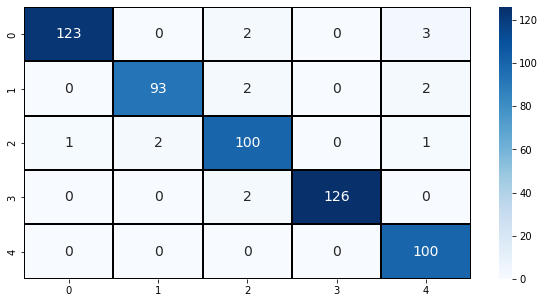

In [ ]:
acc = accuracy_score(y_test, y_pred)*100
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Our Naive Bayes model was {acc:.2f}% accurate")
fig = plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", linecolor="black", linewidths="1", annot_kws={"size": 14});